In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://datahub.io/core/covid-19/r/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

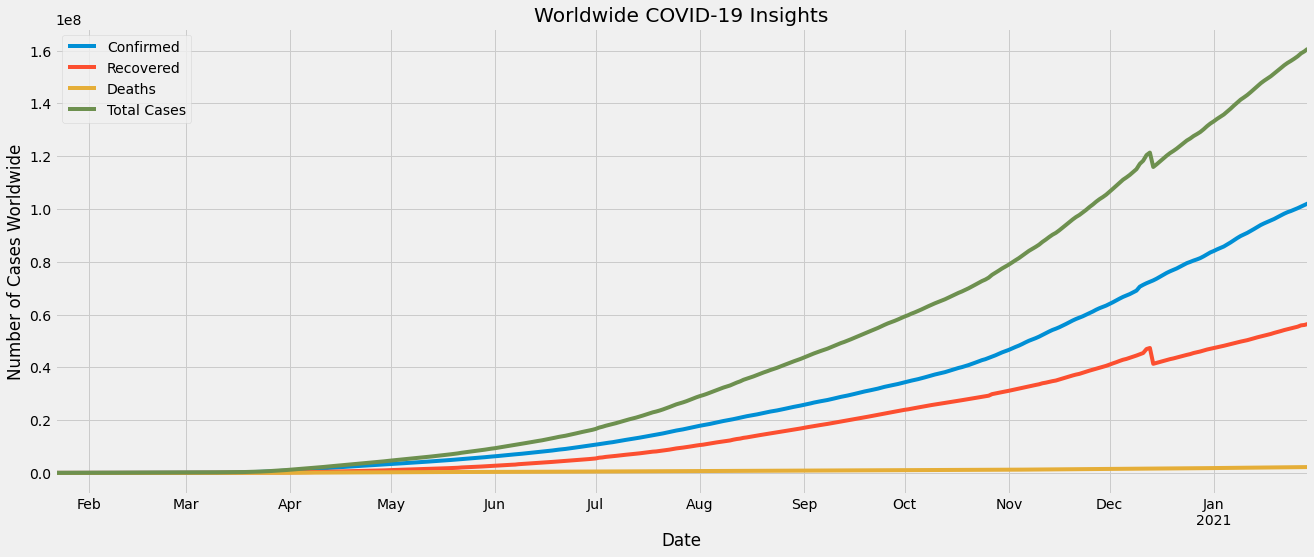

In [5]:
# Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(20, 8))
w.set_xlabel('Date')
w.set_ylabel('Number of Cases Worldwide')
w.title.set_text('Worldwide COVID-19 Insights')

plt.show()

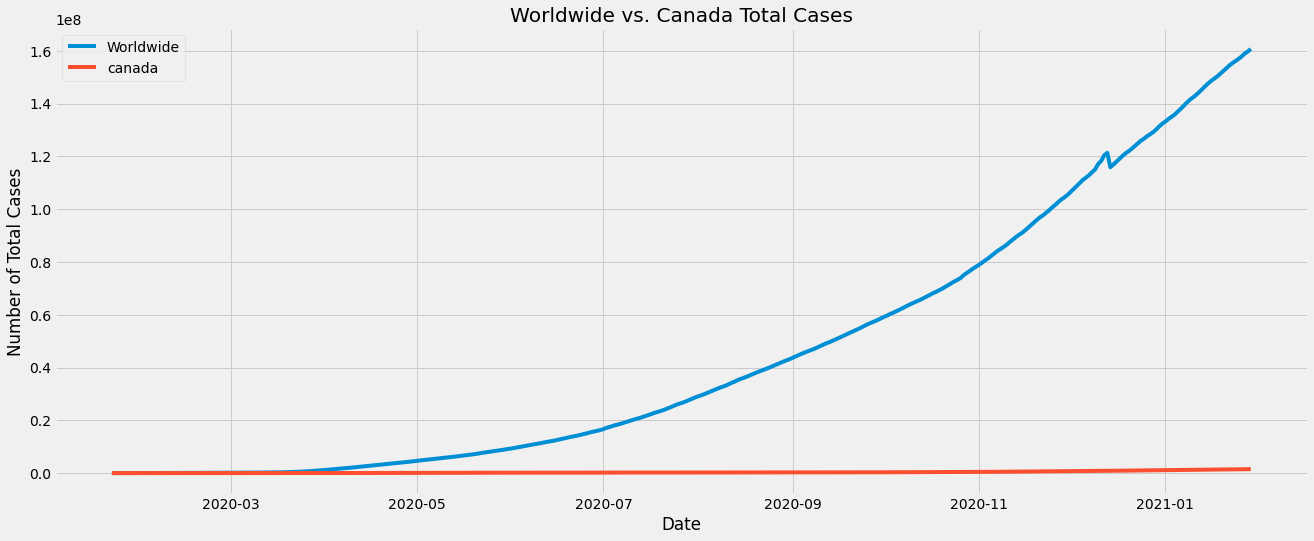

In [8]:
ca_df = df[df['Country']==f'Canada'].groupby(['Date']).sum()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(ca_df[['Total Cases']], label=f'Canada')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Total Cases')
ax.title.set_text(f'Worldwide vs. Canada Total Cases')

plt.legend(loc='upper left')
plt.show()

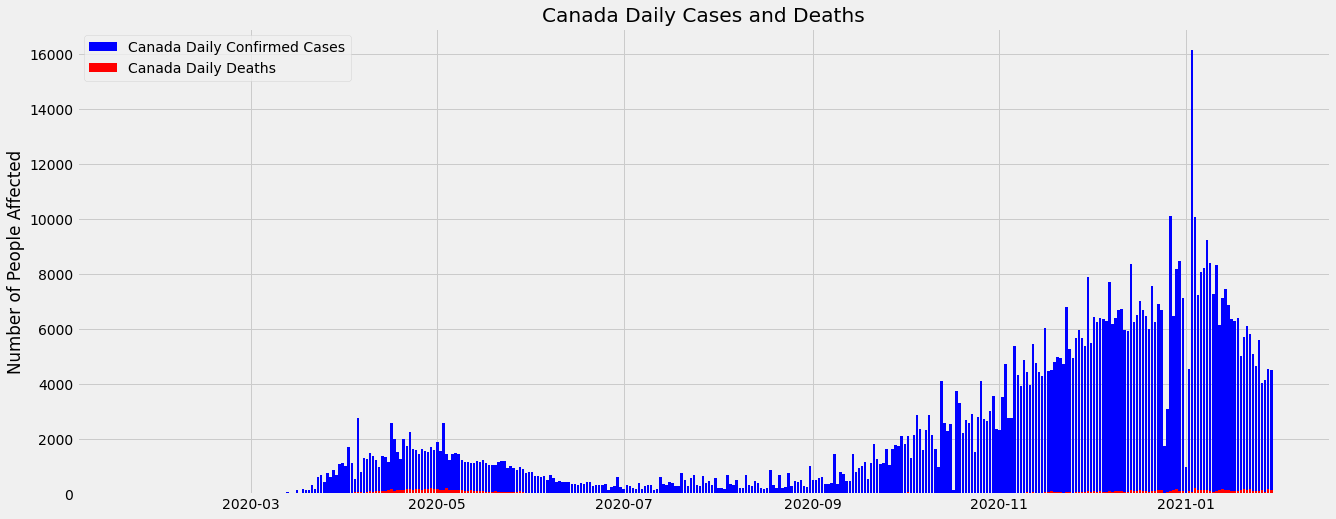

In [11]:
# Canada Daily Cases and Deaths
ca_df = ca_df.reset_index()
ca_df['Daily Confirmed'] = ca_df['Confirmed'].sub(ca_df['Confirmed'].shift())
ca_df['Daily Deaths'] = ca_df['Deaths'].sub(ca_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(ca_df['Date'], ca_df['Daily Confirmed'], color='b', label=f'Canada Daily Confirmed Cases')
ax.bar(ca_df['Date'], ca_df['Daily Deaths'], color='r', label=f'Canada Daily Deaths')
ax.set_ylabel('Number of People Affected')
ax.title.set_text(f'Canada Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

([<matplotlib.patches.Wedge at 0x213b312c730>,
 [Text(0.7680682048853638, 0.7874460188763259, 'US'),
  Text(-0.3842627486953108, 1.0306998301955448, 'India'),
  Text(-0.9069365110328692, 0.6224678023444478, 'Brazil'),
  Text(-1.0770238437248782, 0.22365070992082497, 'United Kingdom'),
  Text(-1.0995778719126426, -0.03047135704336642, 'Russia'),
  Text(-1.0679626753097864, -0.2635445392057359, 'France'),
  Text(-1.0027146223482497, -0.4522868405437055, 'Spain'),
  Text(-0.9168475516795688, -0.6077750957214194, 'Italy'),
  Text(-0.8127874726606232, -0.7411993822757523, 'Turkey'),
  Text(-0.6979790085344201, -0.8501913335510473, 'Germany'),
  Text(0.5037347195477423, -0.9778810420097925, 'Rest of World')],
 [Text(0.4189462935738348, 0.42951601029617775, '25.4%'),
  Text(-0.20959786292471497, 0.562199907379388, '10.6%'),
  Text(-0.49469264238156496, 0.3395278921878806, '8.9%'),
  Text(-0.5874675511226608, 0.12199129632044997, '3.7%'),
  Text(-0.5997697483159868, -0.01662074020547259, '3.7%

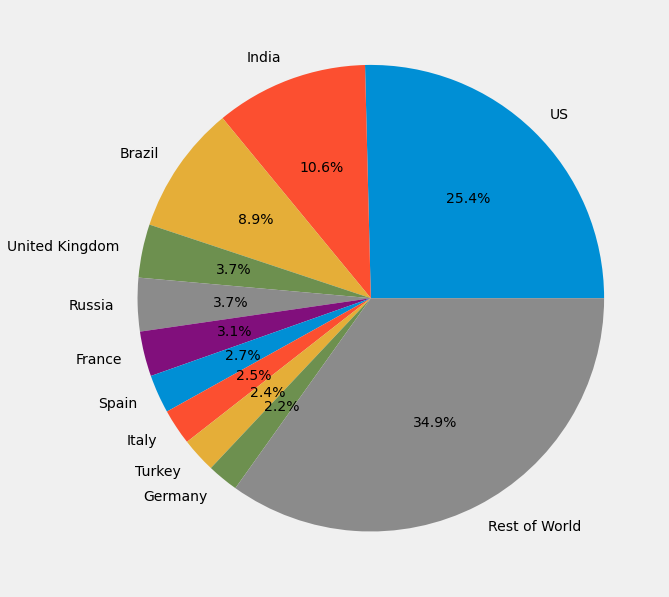

In [15]:
from datetime import date, timedelta
previous = date.today() - timedelta(days=3)
previous.strftime('%Y-%m-%d')

today_df = df[df['Date'] == str(previous)]
top_ten = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_ten.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_ten.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.pie(top_ten['Confirmed'], labels=top_ten['Country'], autopct='%1.1f%%')